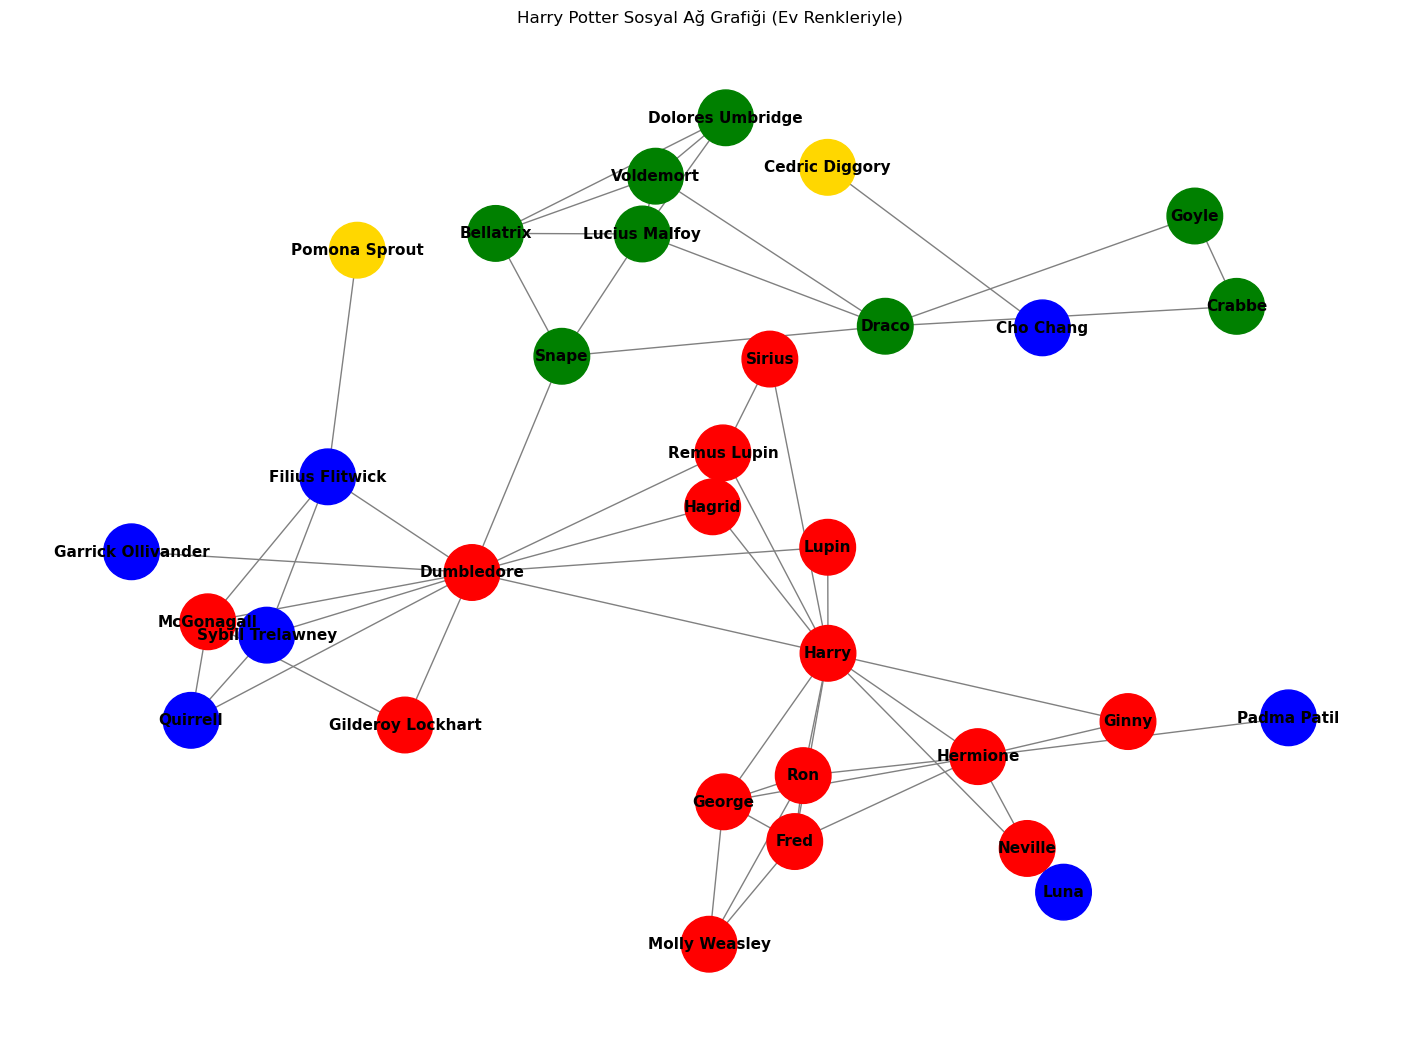

📌 En çok arkadaşı olan karakter: Harry (11 arkadaş)
📌 Yalnız karakterler: []
📌 En merkezi karakter (degree centrality): Harry (0.35)


In [89]:
import networkx as nx
import matplotlib.pyplot as plt

# Grafik oluştur
G = nx.Graph()

# Karakterler ve ev bilgileri
# Karakterler ve ev bilgileri
houses = {
    "Harry": "Gryffindor",
    "Ron": "Gryffindor",
    "Hermione": "Gryffindor",
    "Dumbledore": "Gryffindor",
    "Hagrid": "Gryffindor",
    "Sirius": "Gryffindor",
    "Ginny": "Gryffindor",
    "Fred": "Gryffindor",
    "George": "Gryffindor",
    "Neville": "Gryffindor",
    "Draco": "Slytherin",
    "Snape": "Slytherin",
    "Voldemort": "Slytherin",
    "Bellatrix": "Slytherin",
    "Luna": "Ravenclaw",
    "Cho Chang": "Ravenclaw",
    "Cedric Diggory": "Hufflepuff",
    "Remus Lupin": "Gryffindor",
    "Molly Weasley": "Gryffindor",
    "Lupin": "Gryffindor",
    "McGonagall": "Gryffindor",
    "Lucius Malfoy": "Slytherin",
    "Pomona Sprout": "Hufflepuff",
    "Filius Flitwick": "Ravenclaw",
    "Gilderoy Lockhart": "Gryffindor",
    "Crabbe": "Slytherin",
    "Goyle": "Slytherin",
    "Dolores Umbridge": "Slytherin",
    "Quirrell": "Ravenclaw",
    "Garrick Ollivander": "Ravenclaw",
    "Sybill Trelawney": "Ravenclaw",
    "Padma Patil": "Ravenclaw" 
}


# Düğümleri ekle
G.add_nodes_from(houses.keys())

# Arkadaşlık bağlantıları
friendships = [
    ("Harry", "Ron"), ("Harry", "Hermione"), ("Harry", "Sirius"), ("Harry", "Hagrid"),
    ("Harry","Dumbledore"),("Harry","Luna"),("Harry","Ginny"),("Fred","Harry"),("Harry","George"),
    ("Harry","Luna"),("Harry","Lupin"),("Ron","Molly Weasley"),("Hermione","Fred"),("Hermione","George"),
    ("Ron", "Hermione"), ("Ron", "Fred"), ("Ron", "George"), ("Hermione", "Neville"),
    ("Dumbledore","Lupin"),
    ("Fred", "George"), ("Ginny", "Hermione"), ("Neville", "Luna"),
    ("Dumbledore", "Snape"), ("Dumbledore", "McGonagall"), ("Dumbledore", "Hagrid"),
    ("Sirius", "Remus Lupin"), ("Draco", "Snape"), ("Draco", "Voldemort"),
    ("Bellatrix", "Voldemort"), ("Bellatrix", "Snape"),
    ("Cho Chang", "Cedric Diggory"),
    ("Molly Weasley", "Fred"), ("Molly Weasley", "George"),
    ("Remus Lupin", "Harry"), ("Remus Lupin", "Dumbledore"),
    ("Lucius Malfoy", "Voldemort"), ("Lucius Malfoy", "Bellatrix"), 
    ("Lucius Malfoy", "Draco"), ("Lucius Malfoy", "Snape"),
    ("Pomona Sprout", "Filius Flitwick"),
    ("Filius Flitwick", "Dumbledore"), ("Filius Flitwick", "McGonagall"),
    ("Gilderoy Lockhart", "Dumbledore"), ("Gilderoy Lockhart", "McGonagall"),
    ("Draco", "Crabbe"), ("Draco", "Goyle"),
    ("Crabbe", "Goyle"),
    ("Dolores Umbridge", "Lucius Malfoy"), 
    ("Dolores Umbridge", "Voldemort"),
    ("Dolores Umbridge", "Bellatrix"),
    ("Quirrell", "Dumbledore"), ("Quirrell", "McGonagall"), ("Quirrell", "Sybill Trelawney"),
    ("Garrick Ollivander", "Dumbledore"),
    ("Sybill Trelawney", "Dumbledore"), ("Sybill Trelawney", "McGonagall"), ("Sybill Trelawney", "Filius Flitwick"),
    ("Padma Patil", "Hermione")  
]

# Arkadaşlık bağlantılarını ekleme
G.add_edges_from(friendships)

# Renkleri belirleme
colors = {
    "Gryffindor": "red",
    "Slytherin": "green",
    "Ravenclaw": "blue",
    "Hufflepuff": "gold"
}

node_colors = [colors.get(houses[node], "gray") for node in G.nodes()]

# Grafiği çizmek için düğüm konumlarını hesapla (spring_layout ile daha geniş alan)
pos = nx.spring_layout(G, seed=42, k=0.7)  # k değeri mesafeyi ayarlar

# Grafiği çizdir
plt.figure(figsize=(14,10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1600, font_size=11, edge_color="gray", font_weight="bold")
plt.title("Harry Potter Sosyal Ağ Grafiği (Ev Renkleriyle)")
plt.show()



# ANALİZLER 📊

# En çok arkadaşı olan karakter (sorted ile daha güvenli bir çözüm)
max_friends = sorted(G.degree, key=lambda x: x[1], reverse=True)[0]
print(f"📌 En çok arkadaşı olan karakter: {max_friends[0]} ({max_friends[1]} arkadaş)")

# Hiç arkadaşı olmayan karakterler
lonely_characters = [node for node in G.nodes if G.degree(node) == 0]
print(f"📌 Yalnız karakterler: {lonely_characters}")

# Degree Centrality (en merkezi karakter)
centrality = nx.degree_centrality(G)
most_central = max(centrality, key=centrality.get)
print(f"📌 En merkezi karakter (degree centrality): {most_central} ({centrality[most_central]:.2f})")



In [91]:
import pandas as pd
import seaborn as sns

# Evler listesi
house_names = list(set(houses.values()))

# Boş dataframe
house_connections = pd.DataFrame(0, index=house_names, columns=house_names)

# Kenarları döngüyle kontrol et
for edge in G.edges():
    house1 = houses[edge[0]]
    house2 = houses[edge[1]]
    house_connections.loc[house1, house2] += 1
    if house1 != house2:
        house_connections.loc[house2, house1] += 1  # Çift taraflı say

house_connections


,Hufflepuff,Slytherin,Gryffindor,Ravenclaw
Hufflepuff,0,0,0,2
Slytherin,0,14,1,0
Gryffindor,0,1,28,10
Ravenclaw,2,0,10,2


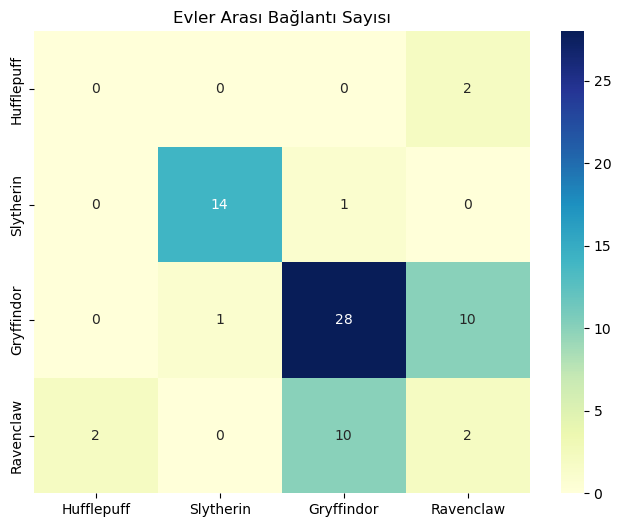

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(house_connections, annot=True, cmap="YlGnBu")
plt.title("Evler Arası Bağlantı Sayısı")
plt.show()


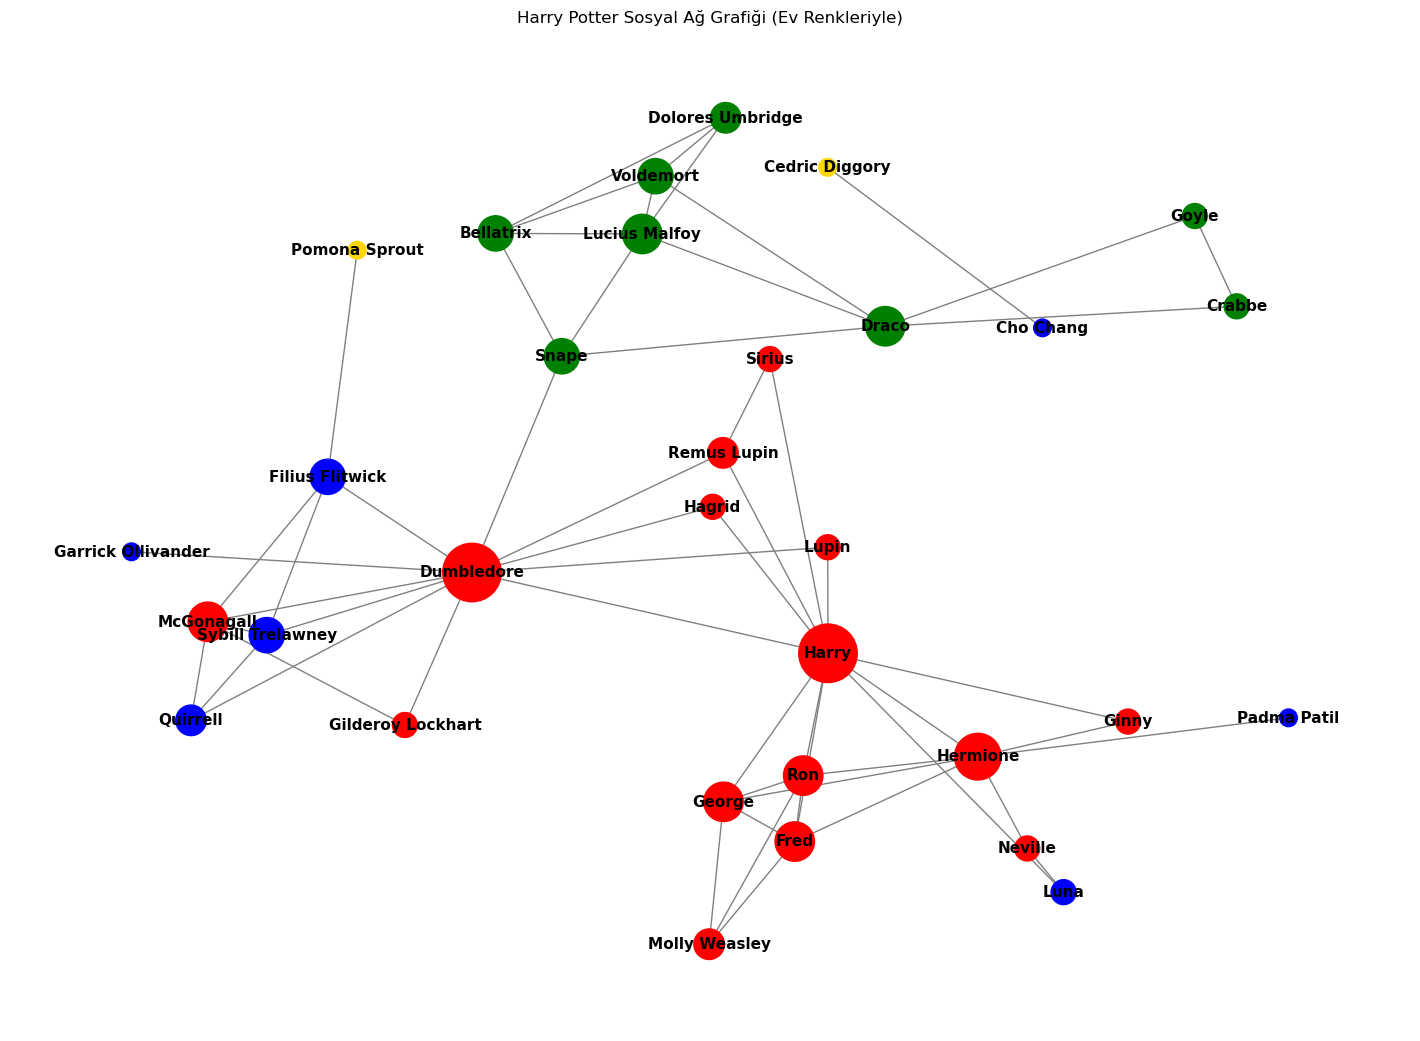

📌 En çok arkadaşı olan karakter: Harry (11 arkadaş)
📌 Yalnız karakterler: []
📌 En merkezi karakter (degree centrality): Harry (0.35)


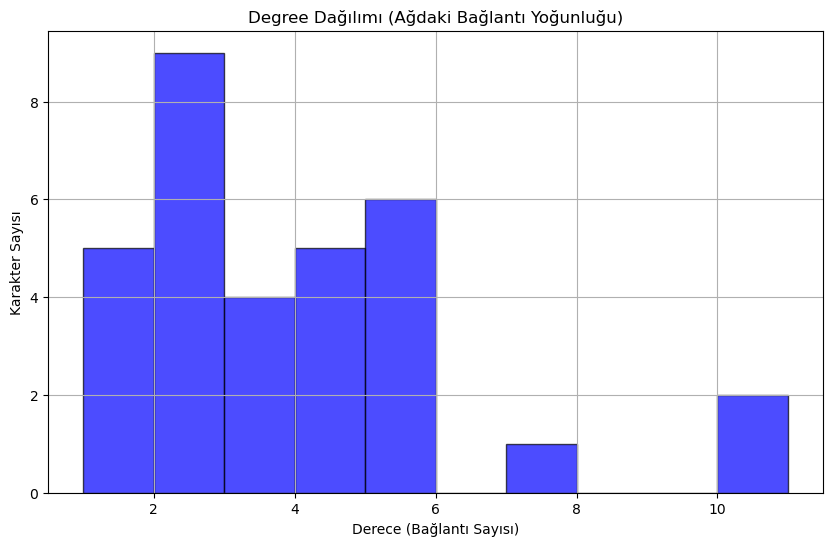

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

# Grafik oluştur
G = nx.Graph()

# Karakterler ve ev bilgileri
houses = {
    "Harry": "Gryffindor",
    "Ron": "Gryffindor",
    "Hermione": "Gryffindor",
    "Dumbledore": "Gryffindor",
    "Hagrid": "Gryffindor",
    "Sirius": "Gryffindor",
    "Ginny": "Gryffindor",
    "Fred": "Gryffindor",
    "George": "Gryffindor",
    "Neville": "Gryffindor",
    "Draco": "Slytherin",
    "Snape": "Slytherin",
    "Voldemort": "Slytherin",
    "Bellatrix": "Slytherin",
    "Luna": "Ravenclaw",
    "Cho Chang": "Ravenclaw",
    "Cedric Diggory": "Hufflepuff",
    "Remus Lupin": "Gryffindor",
    "Molly Weasley": "Gryffindor",
    "Lupin": "Gryffindor",
    "McGonagall": "Gryffindor",
    "Lucius Malfoy": "Slytherin",
    "Pomona Sprout": "Hufflepuff",
    "Filius Flitwick": "Ravenclaw",
    "Gilderoy Lockhart": "Gryffindor",
    "Crabbe": "Slytherin",
    "Goyle": "Slytherin",
    "Dolores Umbridge": "Slytherin",
    "Quirrell": "Ravenclaw",
    "Garrick Ollivander": "Ravenclaw",
    "Sybill Trelawney": "Ravenclaw",
    "Padma Patil": "Ravenclaw"
}

# Düğümleri ekle
G.add_nodes_from(houses.keys())

# Arkadaşlık bağlantıları
friendships = [
    ("Harry", "Ron"), ("Harry", "Hermione"), ("Harry", "Sirius"), ("Harry", "Hagrid"),
    ("Harry","Dumbledore"),("Harry","Luna"),("Harry","Ginny"),("Fred","Harry"),("Harry","George"),
    ("Harry","Luna"),("Harry","Lupin"),("Ron","Molly Weasley"),("Hermione","Fred"),("Hermione","George"),
    ("Ron", "Hermione"), ("Ron", "Fred"), ("Ron", "George"), ("Hermione", "Neville"),
    ("Dumbledore","Lupin"),
    ("Fred", "George"), ("Ginny", "Hermione"), ("Neville", "Luna"),
    ("Dumbledore", "Snape"), ("Dumbledore", "McGonagall"), ("Dumbledore", "Hagrid"),
    ("Sirius", "Remus Lupin"), ("Draco", "Snape"), ("Draco", "Voldemort"),
    ("Bellatrix", "Voldemort"), ("Bellatrix", "Snape"),
    ("Cho Chang", "Cedric Diggory"),
    ("Molly Weasley", "Fred"), ("Molly Weasley", "George"),
    ("Remus Lupin", "Harry"), ("Remus Lupin", "Dumbledore"),
    ("Lucius Malfoy", "Voldemort"), ("Lucius Malfoy", "Bellatrix"), 
    ("Lucius Malfoy", "Draco"), ("Lucius Malfoy", "Snape"),
    ("Pomona Sprout", "Filius Flitwick"),
    ("Filius Flitwick", "Dumbledore"), ("Filius Flitwick", "McGonagall"),
    ("Gilderoy Lockhart", "Dumbledore"), ("Gilderoy Lockhart", "McGonagall"),
    ("Draco", "Crabbe"), ("Draco", "Goyle"),
    ("Crabbe", "Goyle"),
    ("Dolores Umbridge", "Lucius Malfoy"), 
    ("Dolores Umbridge", "Voldemort"),
    ("Dolores Umbridge", "Bellatrix"),
    ("Quirrell", "Dumbledore"), ("Quirrell", "McGonagall"), ("Quirrell", "Sybill Trelawney"),
    ("Garrick Ollivander", "Dumbledore"),
    ("Sybill Trelawney", "Dumbledore"), ("Sybill Trelawney", "McGonagall"), ("Sybill Trelawney", "Filius Flitwick"),
    ("Padma Patil", "Hermione")  
]

# Arkadaşlık bağlantılarını ekle
G.add_edges_from(friendships)

# Renkleri belirle
colors = {
    "Gryffindor": "red",
    "Slytherin": "green",
    "Ravenclaw": "blue",
    "Hufflepuff": "gold"
}

node_colors = [colors.get(houses[node], "gray") for node in G.nodes()]

# Merkeziyet hesaplamaları
centrality = nx.degree_centrality(G)
node_sizes = [5000 * centrality[node] for node in G.nodes()]  # Merkeziyetle orantılı düğüm boyutu

# Grafiği çizmek için düğüm konumlarını hesapla (spring_layout ile daha geniş alan)
pos = nx.spring_layout(G, seed=42, k=0.7)  # k değeri mesafeyi ayarlar

# Grafiği çizdir
plt.figure(figsize=(14,10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=11, edge_color="gray", font_weight="bold")
plt.title("Harry Potter Sosyal Ağ Grafiği (Ev Renkleriyle)")
plt.show()

# ANALİZLER 📊

# En çok arkadaşı olan karakter
max_friends = sorted(G.degree, key=lambda x: x[1], reverse=True)[0]
print(f"📌 En çok arkadaşı olan karakter: {max_friends[0]} ({max_friends[1]} arkadaş)")

# Hiç arkadaşı olmayan karakterler
lonely_characters = [node for node in G.nodes if G.degree(node) == 0]
print(f"📌 Yalnız karakterler: {lonely_characters}")

# Degree Centrality (en merkezi karakter)
most_central = max(centrality, key=centrality.get)
print(f"📌 En merkezi karakter (degree centrality): {most_central} ({centrality[most_central]:.2f})")

# Degree Distribution (Derece Dağılımı) - Histogram
degree_sequence = [d for n, d in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree Dağılımı (Ağdaki Bağlantı Yoğunluğu)")
plt.xlabel("Derece (Bağlantı Sayısı)")
plt.ylabel("Karakter Sayısı")
plt.grid(True)
plt.show()


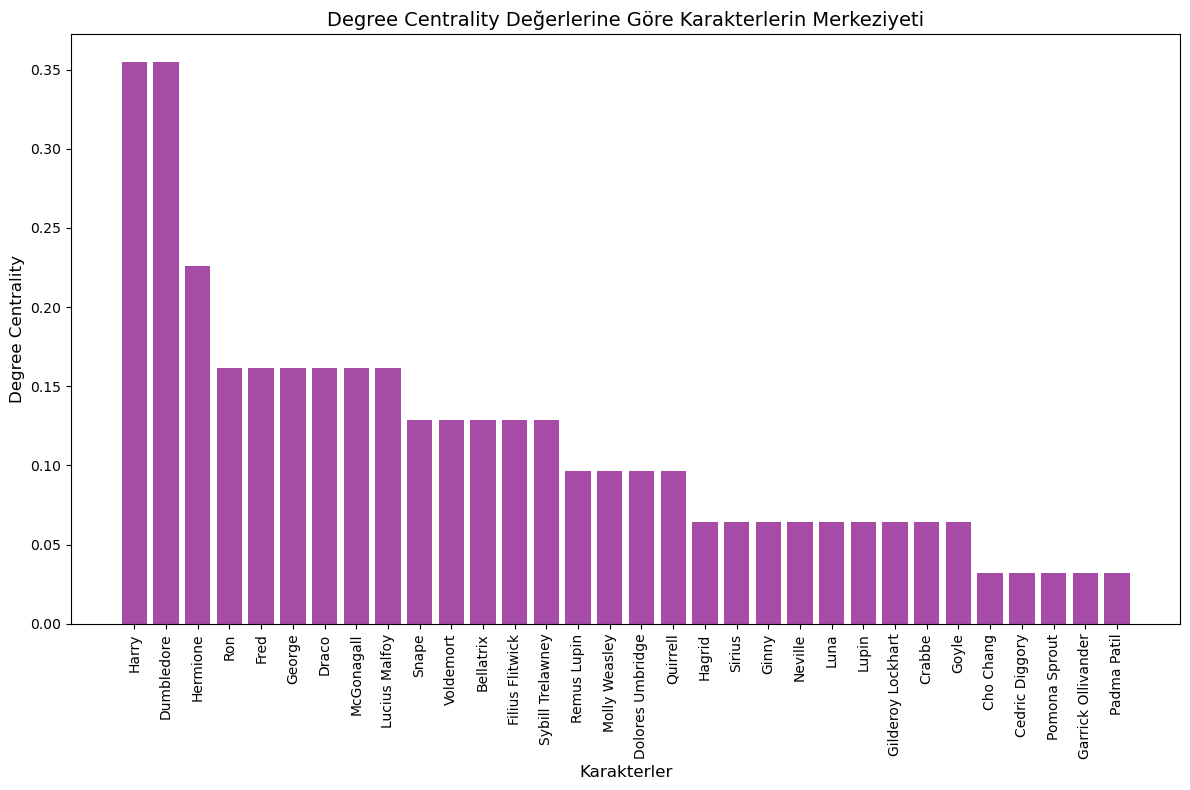

Degree Centrality:
Harry: 0.355
Dumbledore: 0.355
Hermione: 0.226
Ron: 0.161
Fred: 0.161
George: 0.161
Draco: 0.161
McGonagall: 0.161
Lucius Malfoy: 0.161
Snape: 0.129
Voldemort: 0.129
Bellatrix: 0.129
Filius Flitwick: 0.129
Sybill Trelawney: 0.129
Remus Lupin: 0.097
Molly Weasley: 0.097
Dolores Umbridge: 0.097
Quirrell: 0.097
Hagrid: 0.065
Sirius: 0.065
Ginny: 0.065
Neville: 0.065
Luna: 0.065
Lupin: 0.065
Gilderoy Lockhart: 0.065
Crabbe: 0.065
Goyle: 0.065
Cho Chang: 0.032
Cedric Diggory: 0.032
Pomona Sprout: 0.032
Garrick Ollivander: 0.032
Padma Patil: 0.032


In [103]:
# Degree Centrality hesaplamaları
deg_cent = nx.degree_centrality(G)
deg_cent_sorted = dict(sorted(deg_cent.items(), key=lambda item: item[1], reverse=True))

# Degree Centrality Görselleştirmesi - Çubuk Grafik
plt.figure(figsize=(12, 8))
plt.bar(deg_cent_sorted.keys(), deg_cent_sorted.values(), color='purple', alpha=0.7)
plt.xlabel("Karakterler", fontsize=12)
plt.ylabel("Degree Centrality", fontsize=12)
plt.title("Degree Centrality Değerlerine Göre Karakterlerin Merkeziyeti", fontsize=14)
plt.xticks(rotation=90)  # X eksenindeki karakter isimlerini döndürmek için
plt.tight_layout()
plt.show()

# Degree Centrality değerlerini yazdır
print("Degree Centrality:")
for char, val in deg_cent_sorted.items():
    print(f"{char}: {val:.3f}")


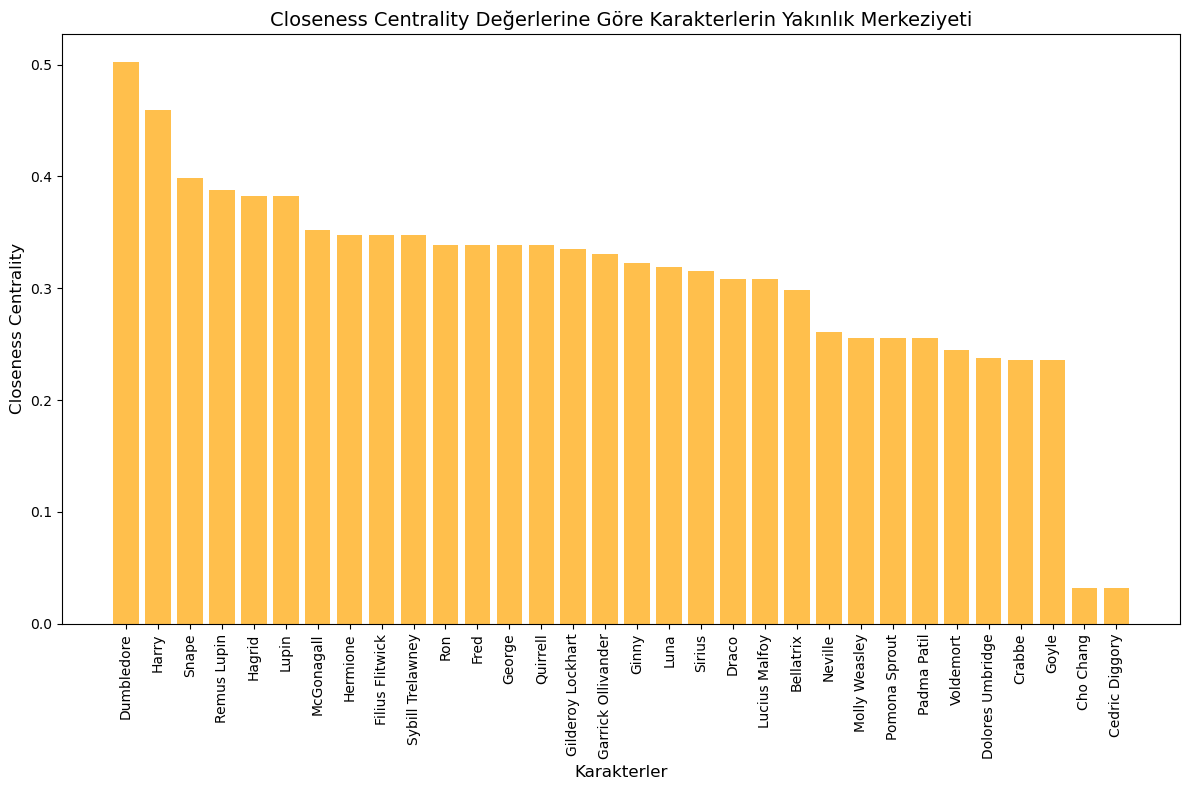


Closeness Centrality:
Dumbledore: 0.502
Harry: 0.460
Snape: 0.399
Remus Lupin: 0.388
Hagrid: 0.382
Lupin: 0.382
McGonagall: 0.352
Hermione: 0.348
Filius Flitwick: 0.348
Sybill Trelawney: 0.348
Ron: 0.339
Fred: 0.339
George: 0.339
Quirrell: 0.339
Gilderoy Lockhart: 0.335
Garrick Ollivander: 0.331
Ginny: 0.323
Luna: 0.319
Sirius: 0.315
Draco: 0.308
Lucius Malfoy: 0.308
Bellatrix: 0.298
Neville: 0.261
Molly Weasley: 0.256
Pomona Sprout: 0.256
Padma Patil: 0.256
Voldemort: 0.244
Dolores Umbridge: 0.238
Crabbe: 0.236
Goyle: 0.236
Cho Chang: 0.032
Cedric Diggory: 0.032


In [105]:
# Closeness Centrality hesaplamaları
close_cent = nx.closeness_centrality(G)
close_cent_sorted = dict(sorted(close_cent.items(), key=lambda item: item[1], reverse=True))

# Closeness Centrality Görselleştirmesi - Çubuk Grafik
plt.figure(figsize=(12, 8))
plt.bar(close_cent_sorted.keys(), close_cent_sorted.values(), color='orange', alpha=0.7)
plt.xlabel("Karakterler", fontsize=12)
plt.ylabel("Closeness Centrality", fontsize=12)
plt.title("Closeness Centrality Değerlerine Göre Karakterlerin Yakınlık Merkeziyeti", fontsize=14)
plt.xticks(rotation=90)  # X eksenindeki karakter isimlerini döndürmek için
plt.tight_layout()
plt.show()

# Closeness Centrality değerlerini yazdır
print("\nCloseness Centrality:")
for char, val in close_cent_sorted.items():
    print(f"{char}: {val:.3f}")


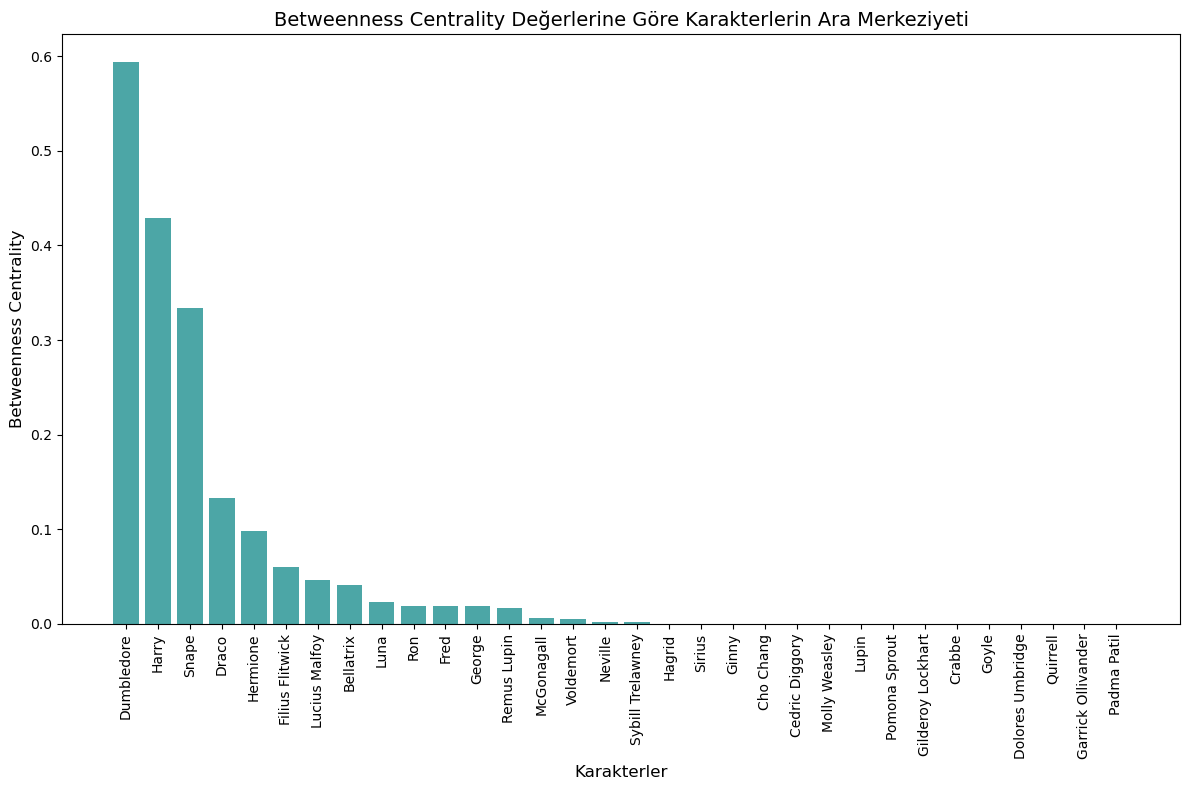


Betweenness Centrality:
Dumbledore: 0.594
Harry: 0.429
Snape: 0.333
Draco: 0.133
Hermione: 0.098
Filius Flitwick: 0.060
Lucius Malfoy: 0.047
Bellatrix: 0.041
Luna: 0.023
Ron: 0.019
Fred: 0.019
George: 0.019
Remus Lupin: 0.017
McGonagall: 0.006
Voldemort: 0.005
Neville: 0.002
Sybill Trelawney: 0.001
Hagrid: 0.000
Sirius: 0.000
Ginny: 0.000
Cho Chang: 0.000
Cedric Diggory: 0.000
Molly Weasley: 0.000
Lupin: 0.000
Pomona Sprout: 0.000
Gilderoy Lockhart: 0.000
Crabbe: 0.000
Goyle: 0.000
Dolores Umbridge: 0.000
Quirrell: 0.000
Garrick Ollivander: 0.000
Padma Patil: 0.000


In [107]:
# Betweenness Centrality hesaplamaları
btw_cent = nx.betweenness_centrality(G)
btw_cent_sorted = dict(sorted(btw_cent.items(), key=lambda item: item[1], reverse=True))

# Betweenness Centrality Görselleştirmesi - Çubuk Grafik
plt.figure(figsize=(12, 8))
plt.bar(btw_cent_sorted.keys(), btw_cent_sorted.values(), color='teal', alpha=0.7)
plt.xlabel("Karakterler", fontsize=12)
plt.ylabel("Betweenness Centrality", fontsize=12)
plt.title("Betweenness Centrality Değerlerine Göre Karakterlerin Ara Merkeziyeti", fontsize=14)
plt.xticks(rotation=90)  # X eksenindeki karakter isimlerini döndürmek için
plt.tight_layout()
plt.show()

# Betweenness Centrality değerlerini yazdır
print("\nBetweenness Centrality:")
for char, val in btw_cent_sorted.items():
    print(f"{char}: {val:.3f}")



Grafikte 2 bağlı bileşen var.
Bileşen 1: {'Sybill Trelawney', 'Voldemort', 'Padma Patil', 'Molly Weasley', 'Lucius Malfoy', 'Garrick Ollivander', 'George', 'Bellatrix', 'Quirrell', 'Dolores Umbridge', 'McGonagall', 'Pomona Sprout', 'Dumbledore', 'Hermione', 'Luna', 'Lupin', 'Goyle', 'Crabbe', 'Filius Flitwick', 'Neville', 'Remus Lupin', 'Snape', 'Ron', 'Hagrid', 'Sirius', 'Draco', 'Ginny', 'Fred', 'Harry', 'Gilderoy Lockhart'}
Bileşen 2: {'Cedric Diggory', 'Cho Chang'}


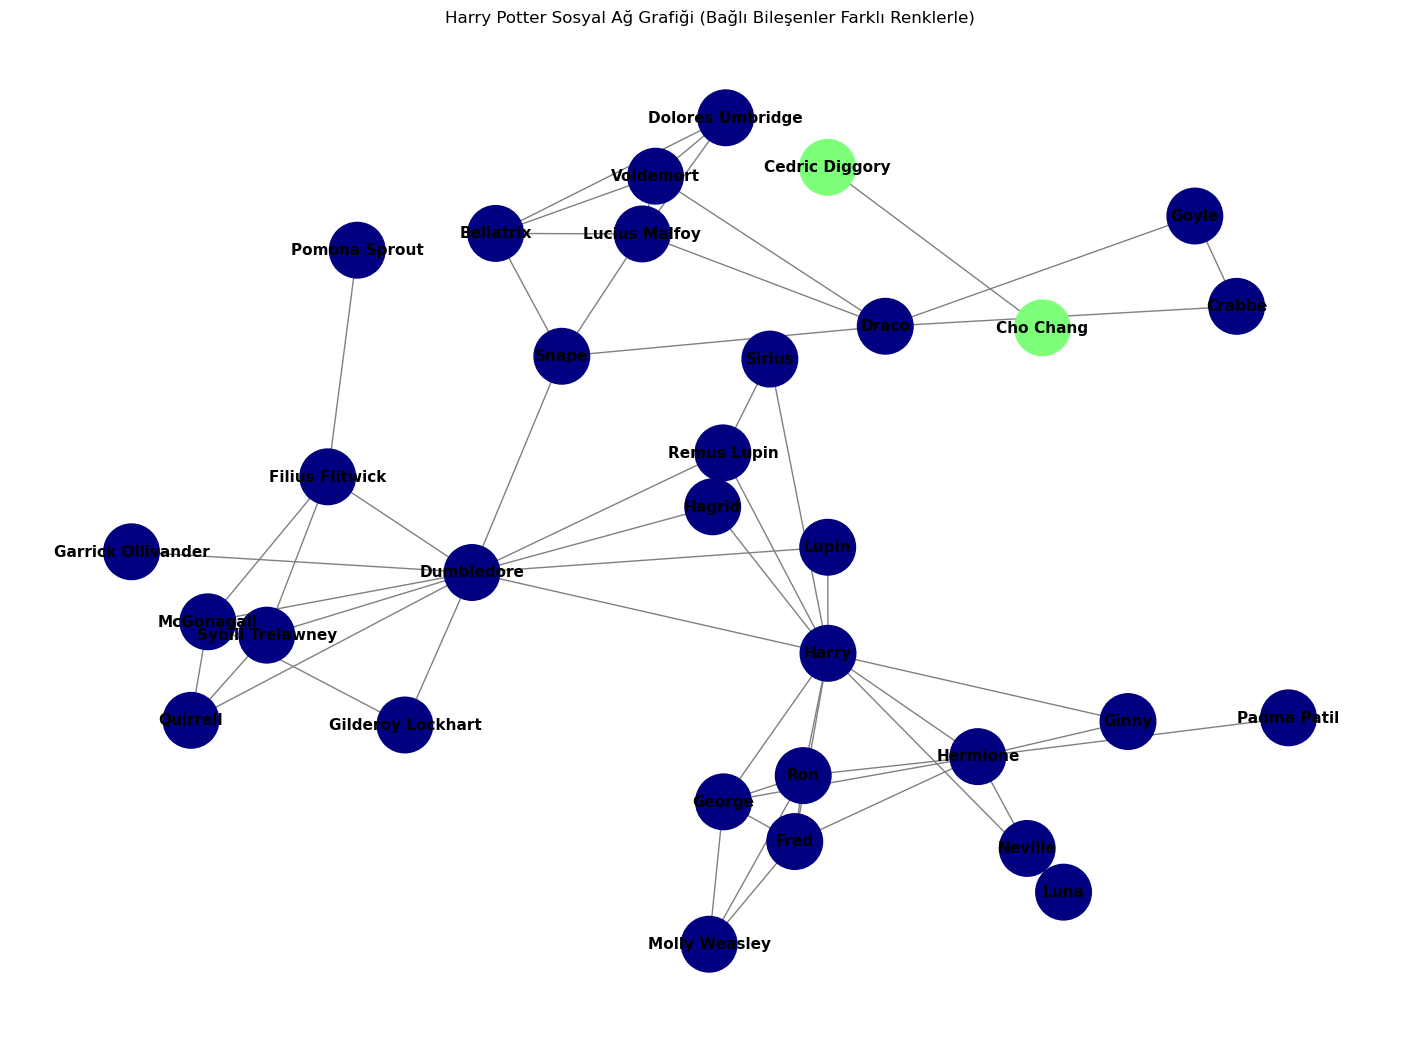

In [109]:
# Bağlı bileşenleri bulma
components = list(nx.connected_components(G))
print(f"\nGrafikte {len(components)} bağlı bileşen var.")
for i, comp in enumerate(components):
    print(f"Bileşen {i+1}: {comp}")

# Renkleri farklı bileşenler için ayarlama
node_colors = []
for node in G.nodes():
    for i, comp in enumerate(components):
        if node in comp:
            node_colors.append(plt.cm.jet(i / len(components)))  # Her bileşene farklı renk

# Grafiği çizdirme
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42, k=0.7)  # k değeri mesafeyi ayarlar
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1600, font_size=11, edge_color="gray", font_weight="bold")
plt.title("Harry Potter Sosyal Ağ Grafiği (Bağlı Bileşenler Farklı Renklerle)")
plt.show()
